# Upset Plot
This script was used to demonstrate the peak overlaps between TFs.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from upsetplot import generate_samples, plot, UpSet
plt.rcParams['font.sans-serif'] = ['Arial'] 

## Data preparation

In [4]:
# Read ChIPseeker output file
data = pd.read_csv(r'peak_gene.csv')
# Check headlines
data.columns

Index(['TF', 'seqnames', 'start', 'end', 'width', 'strand', 'name', 'score',
       'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength',
       'geneStrand', 'geneId', 'transcriptId', 'distanceToTSS'],
      dtype='object')

In [7]:
# Extract the TF and geneId
group_gene = data[['TF','geneId','score']]    # Extra column score will be replaced by counts after compression
# Remove the peaks of the same TF located near the same gene
group_gene_agg = group_gene.groupby(["TF","geneId"]).count().reset_index()

In [9]:
# Convert TF to multiple columns of True/False
gene_by_tf = group_gene_agg.pivot(index='geneId', columns='TF', values='score').fillna(0).reset_index()
# Count is number of peaks near this gene
gene_by_tf['count'] = gene_by_tf[['col2', 'col7', 'col8', 'col13', 'col18']].sum(axis=1)    
# Fill in with True/False
gene_by_tf[['col2', 'col7', 'col8', 'col13', 'col18']] = gene_by_tf[['col2', 'col7', 'col8', 'col13', 'col18']].apply(lambda x: x > 0)
# Reset index
gene_by_tf_all = gene_by_tf.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])

# Show data
gene_by_tf_all.head(10)

TF                                      geneId  count
col2  col7  col8  col13 col18                        
False True  True  False False  Zm00001eb000880    2.0
      False False False True   Zm00001eb002270    1.0
      True  True  False False  Zm00001eb002370    2.0
      False True  False False  Zm00001eb002510    2.0
            False False True   Zm00001eb002680    1.0
      True  False False False  Zm00001eb003240    1.0
                        False  Zm00001eb003360    1.0
            True  False False  Zm00001eb003480    2.0
                        False  Zm00001eb004310    2.0
            False False False  Zm00001eb004430    1.0

## Plots

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

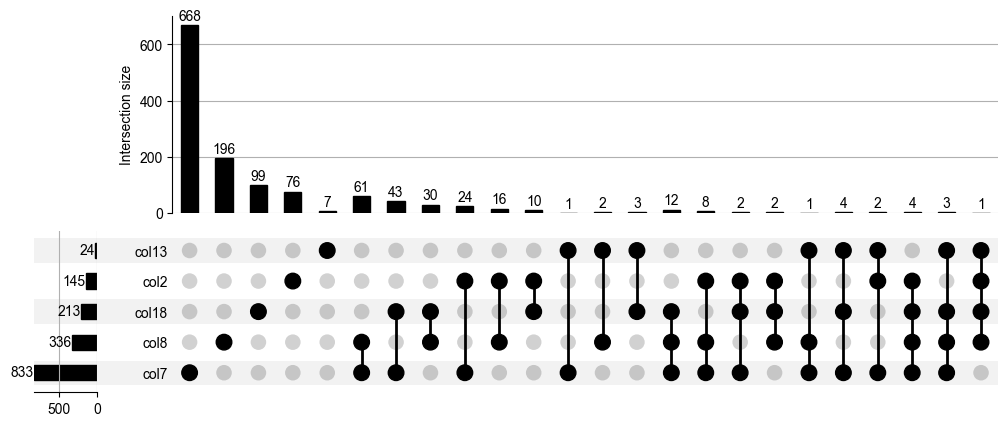

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# All TFs
plot(gene_by_tf_all, subset_size="count", show_counts=True)

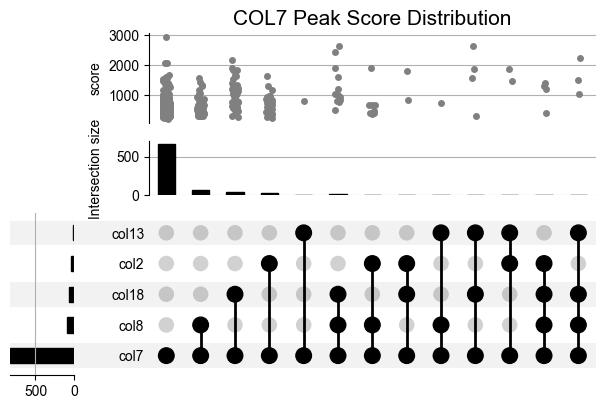

In [28]:
# COL7
# Extract data of col7
gene_col7 = gene_by_tf[gene_by_tf['col7'] == True]
# Calculate avg_score
avg_score_col7 = group_gene[group_gene['TF'] == 'col7'].groupby('geneId')['score'].mean().reset_index()
# Merge TF tags and avg_score
merged_col7 = pd.merge(gene_col7, avg_score_col7, on='geneId')
# Remove extra columns
merged_col7.drop(['geneId','count'], axis=1, inplace = True)
merged_col7 = merged_col7.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])
# Plot
upset = UpSet(merged_col7, subset_size="count", intersection_plot_elements=2)
upset.add_catplot(value="score", kind="strip",color='grey')

upset.plot()
plt.title("COL7 Peak Score Distribution",fontsize=15)
plt.show()

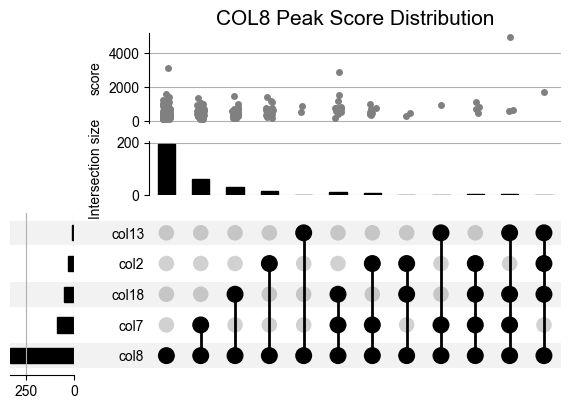

In [27]:
# COL8
# Extract data of col8
gene_col8 = gene_by_tf[gene_by_tf['col8'] == True]
# Calculate avg_score
avg_score_col8 = group_gene[group_gene['TF'] == 'col8'].groupby('geneId')['score'].mean().reset_index()
# Merge TF tags and avg_score
merged_col8 = pd.merge(gene_col8, avg_score_col8, on='geneId')
# Remove extra columns
merged_col8.drop(['geneId','count'], axis=1, inplace = True)
merged_col8 = merged_col8.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])
# Plot
upset = UpSet(merged_col8, subset_size="count", intersection_plot_elements=2)
upset.add_catplot(value="score", kind="strip",color='grey')
upset.plot()
plt.title("COL8 Peak Score Distribution",fontsize=15)
plt.show()

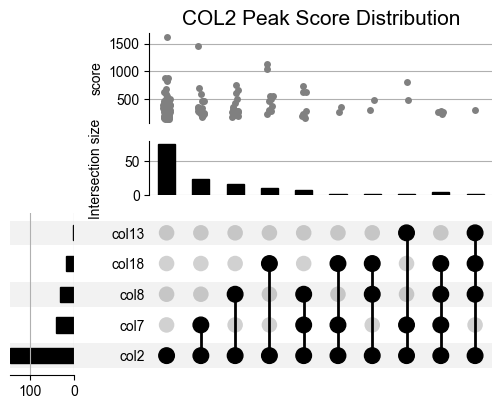

In [29]:
# COL2
# Extract data of col2
gene_col2 = gene_by_tf[gene_by_tf['col2'] == True]
# Calculate avg_score
avg_score_col2 = group_gene[group_gene['TF'] == 'col2'].groupby('geneId')['score'].mean().reset_index()
# Merge TF tags and avg_score
merged_col2 = pd.merge(gene_col2, avg_score_col2, on='geneId')
# Remove extra columns
merged_col2.drop(['geneId','count'], axis=1, inplace = True)
merged_col2 = merged_col2.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])
# Plot
upset = UpSet(merged_col2, subset_size="count", intersection_plot_elements=2)
upset.add_catplot(value="score", kind="strip",color='grey')
upset.plot()
plt.title("COL2 Peak Score Distribution",fontsize=15)
plt.show()

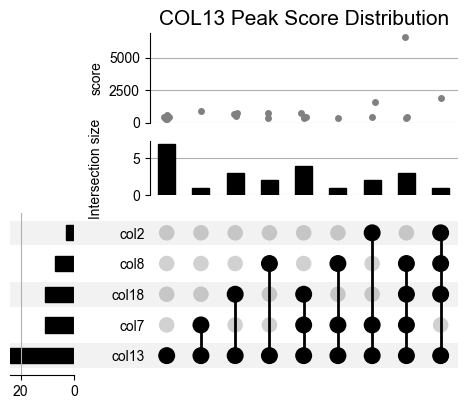

In [30]:
# COL13
# Extract data of col13
gene_col13 = gene_by_tf[gene_by_tf['col13'] == True]
# Calculate avg_score
avg_score_col13 = group_gene[group_gene['TF'] == 'col13'].groupby('geneId')['score'].mean().reset_index()
# Merge TF tags and avg_score
merged_col13 = pd.merge(gene_col13, avg_score_col13, on='geneId')
# Remove extra columns
merged_col13.drop(['geneId','count'], axis=1, inplace = True)
merged_col13 = merged_col13.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])
# Plot
upset = UpSet(merged_col13, subset_size="count", intersection_plot_elements=2)
upset.add_catplot(value="score", kind="strip",color='grey')
upset.plot()
plt.title("COL13 Peak Score Distribution",fontsize=15)
plt.show()

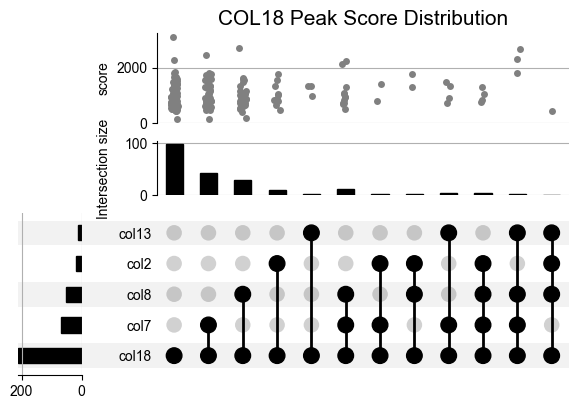

In [31]:
# COL18
# Extract data of col18
gene_col18 = gene_by_tf[gene_by_tf['col18'] == True]
# Calculate avg_score
avg_score_col18 = group_gene[group_gene['TF'] == 'col18'].groupby('geneId')['score'].mean().reset_index()
# Merge TF tags and avg_score
merged_col18 = pd.merge(gene_col18, avg_score_col18, on='geneId')
# Remove extra columns
merged_col18.drop(['geneId','count'], axis=1, inplace = True)
merged_col18 = merged_col18.set_index(['col2', 'col7', 'col8', 'col13', 'col18'])
# plot
upset = UpSet(merged_col18, subset_size="count", intersection_plot_elements=2)
upset.add_catplot(value="score", kind="strip",color='grey')
upset.plot()
plt.title("COL18 Peak Score Distribution",fontsize=15)
plt.show()